# Preparations

In [1]:
from transforms import Deslant
from torchvision.transforms import Compose
from dataset import CTCData

import os
import shutil


import matplotlib.pyplot as plt
from PIL import Image
from skimage import io

In [2]:
root_dir = './root_dir/'
uploaded = 'a02-000-06-04.png' # Test-Image, should be on path: ./root_dir/*
uploaded_image_path = os.path.join(root_dir, uploaded)

In [3]:
# setting up environment
try:
    os.mkdir(root_dir)
except FileExistsError:
    pass
try:
    os.mkdir(f'{root_dir}a01')
except FileExistsError:
    pass
try:
    os.mkdir(f'{root_dir}a01/a01-000u')
except FileExistsError:
    pass

current_image_file_path = f'{root_dir}a01/a01-000u/current.png'
shutil.copy(uploaded_image_path, current_image_file_path)

'./root_dir/a01/a01-000u/current.png'

In [4]:
# updating words.csv
with open('./root_dir/words.csv', 'a') as csv_file:
    if os.stat('./root_dir/words.csv').st_size == 0:
        csv_file.write('img,state,word\n')
        csv_file.write(f'{uploaded},ok,text\n')
    else:
        csv_file.write(f'{uploaded},ok,text\n')

# Deslanting Algoritm

In [5]:
dataset = CTCData(csv_file='words.csv',
                  root_dir='./root_dir',
                  transform=Compose([
                     Deslant()]))

In [6]:
img = Image.open(current_image_file_path)
grayscale_img = img.convert('L')
os.remove(current_image_file_path)
grayscale_img.save(current_image_file_path)

# De-Slanted Image

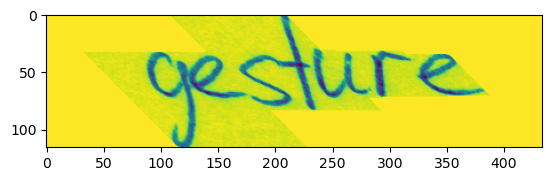

In [7]:
plt.imshow(dataset[0]['image'])

In [9]:

root_dir='./root_dir'
im = io.imread(current_image_file_path)

# Original Image

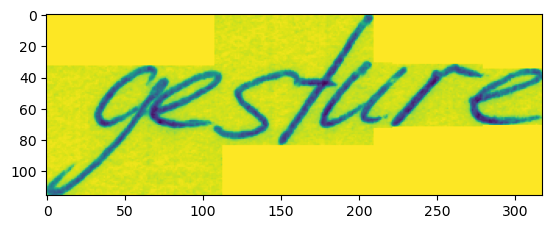

In [10]:
plt.imshow(im)